In [ ]:
#import library
import pandas as pd
import sqlite3
import math
import datetime 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

In [3]:
# konek ke database
conn = sqlite3.connect('database.db')

In [4]:
c = conn.cursor()

![](skema.png)

In [5]:
# membuat table pada database
c.executescript('drop table if exists kota')
c.executescript('drop table if exists pelanggan')
c.executescript('drop table if exists barang')
c.executescript('drop table if exists transaksi')
c.execute("CREATE TABLE IF NOT EXISTS 'kota' ('id' INT, 'kota' VARCHAR(255) NULL, 'provinsi' VARCHAR(255) NULL, PRIMARY KEY ('id'))")
c.execute("CREATE TABLE IF NOT EXISTS 'pelanggan' ('id' INT, 'nama_customer' VARCHAR(255) NULL,'kota_id' INT NOT NULL, PRIMARY KEY ('id'), FOREIGN KEY ('kota_id') REFERENCES 'kota' ('id') ON DELETE NO ACTION ON UPDATE NO ACTION)")
c.execute("CREATE TABLE IF NOT EXISTS 'barang' ( 'id' INT, 'nama_barang' VARCHAR(255) NULL, 'harga_beli' FLOAT NULL, 'harga_jual' FLOAT NULL, 'jenis' VARCHAR(255), 'merk' VARCHAR(255), PRIMARY KEY ('id'))")
c.execute("CREATE TABLE IF NOT EXISTS 'transaksi' ( 'id', 'tanggal_transaksi' DATE NULL, 'jumlah_beli' INT NULL, 'pelanggan_id' INT NOT NULL,'barang_id' INT NOT NULL, PRIMARY KEY ('id'), FOREIGN KEY ('pelanggan_id') REFERENCES 'pelanggan' ('id') ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ('barang_id') REFERENCES 'barang' ('id') ON DELETE NO ACTION ON UPDATE NO ACTION)")

In [6]:
# menampilkan dataset
df = pd.read_csv("dataset.csv")
df

,id,tanggal jual,nama customer,kota,provinsi,nama barang,merk,jenis,harga beli,harga jual,jumlah beli
0,1,1-5-2018,Tomi Bastian,Surabaya,jawa timur,lampu depan,fdr,accessories,10000,15000,1
1,2,1-6-2018,Achmad Faiz,Surabaya,jawa timur,lampu belakang,fdr,accessories,10000,15000,1
2,3,1-7-2018,Putra Dimas,Surabaya,jawa timur,kanvas rem,yanmar,rem,12000,16000,1
3,4,1-9-2018,Beny Sitanggang,Surabaya,jawa timur,oli mesin,yamalube,mesin,9000,10000,1
4,5,1-9-2018,Beny Sitanggang,Surabaya,jawa timur,rantai,castrol,mesin,9000,10000,1
...,...,...,...,...,...,...,...,...,...,...,...
196,197,2-19-2018,Sifa uzy,Surabaya,jawa timur,tangi,kawasaki,accessories,11000,13000,1
197,198,1-20-2018,Lucky Luke,Surabaya,jawa timur,aki,yuasa,aki,17000,150000,1
198,199,1-21-2018,Abdul Somad,Surabaya,jawa timur,lampu belakang,kawasaki,accessories,18000,19000,1
199,200,2-22-2019,Jos Halim,Surabaya,jawa timur,ban dalam,fdr,ban,8600,10000,1


In [7]:
# memasukan dataset pada nilai variable array dibawah ini
kota = []
pelanggan = []
barang = []
for i,j in df.iterrows():
    if [j[3] ,j[4]] not in kota:
        kota.append([j[3],j[4]])
        
    k = 1
    for index, value in enumerate(kota):
        if value == j[3]:
            k = index+1
            break
        
    if [j[2], k] not in pelanggan:
        pelanggan.append([j[2],k])
        
    if isinstance(j[5], str):
        if [j[5],j[8], j[9], j[7], j[6]] not in barang:
            barang.append([j[5],j[8], j[9], j[7], j[6]])

                           
transaksi = []
for i,j in df.iterrows():   
    p = -1
    for index, value in enumerate(pelanggan):
        if value[0] == j[2]:
            p = index+1
            break

    bar = -1
    for index, value in enumerate(barang):
        if value[0] == j[5]:
            bar = index+1
    
    
    transaksi.append([datetime.datetime.strptime(j[1], '%m-%d-%Y').strftime('%Y-%m-%d'), j[10], p, bar])  
    
      
        
    


In [8]:
# memasukan nilai array tadi kedalam table database
c.execute("DELETE FROM KOTA")
for index, i in enumerate(kota): 
    c.execute("INSERT INTO KOTA VALUES(" + str(index+1) + ", '" + str(i[0]) + "','" + str(i[1]) + "')")

c.execute("DELETE FROM PELANGGAN")
for index, i in enumerate(pelanggan):
    c.execute("INSERT INTO PELANGGAN VALUES(" + str(index+1) + ", '" + str(i[0]) + "'," + str(i[1]) + ")") 
    
c.execute("DELETE FROM BARANG")
for index, i in enumerate(barang): 
    c.execute("INSERT INTO BARANG VALUES(" + str(index+1) + ", '" + str(i[0]) + "','" + str(i[1]) + "','" + str(i[2]) + "','"+ str(i[3]) + "','"+ str(i[4]) +"')")

c.execute("DELETE FROM TRANSAKSI")
for index, i in enumerate(transaksi):
    pelanggan_id = i[2] 
    barang_id = i[3]
    c.execute("INSERT INTO TRANSAKSI VALUES(" + str(index+1) + ", '" + str(i[0]) + "','" + str(i[1]) + "'," + str(pelanggan_id) + "," + str(barang_id) + ")")

    
conn.commit()

In [9]:
# menampilkan setiap isi pada table database
c.execute('''SELECT * FROM KOTA''')

KOTA = []
for row in c.fetchall():
    KOTA.append(row)
print("========================KOTA================================")
print(KOTA)
print("============================================================")


c.execute('''SELECT * FROM BARANG''')

KOTA = []
for row in c.fetchall():
    KOTA.append(row)
print("========================BARANG================================")
print(KOTA)
print("============================================================")


c.execute('''SELECT * FROM TRANSAKSI''')
KOTA = []
for row in c.fetchall():
    KOTA.append(row)
print("========================TRANSAKSI================================")
print(KOTA)
print("============================================================")

========================KOTA================================
[(1, 'Surabaya', 'jawa timur'), (2, 'Malang', 'jawa timur'), (3, 'Jember', 'jawa timur'), (4, 'Sidoarjo', 'jawa timur'), (5, 'Gresik', 'jawa timur')]
========================BARANG================================
[(1, 'lampu depan', 10000.0, 15000.0, 'accessories', 'fdr'), (2, 'lampu belakang', 10000.0, 15000.0, 'accessories', 'fdr'), (3, 'kanvas rem', 12000.0, 16000.0, 'rem', 'yanmar'), (4, 'oli mesin', 9000.0, 10000.0, 'mesin', 'yamalube'), (5, 'rantai', 9000.0, 10000.0, 'mesin', 'castrol'), (6, 'velg', 100000.0, 110000.0, 'velg', 'vrossi'), (7, 'ban luar', 10000.0, 10000.0, 'ban', 'fdr'), (8, 'ban dalam', 7000.0, 18000.0, 'ban', 'fdr'), (9, 'busi', 9000.0, 12000.0, 'mesin', 'tdr'), (10, 'oli mesin', 50000.0, 70000.0, 'mesin', 'castrol'), (11, 'spion', 12000.0, 17000.0, 'accessories', 'yamaha'), (12, 'skok', 90000.0, 100000.0, 'skok', 'honda'), (13, 'ban dalam', 10000.0, 120000.0, 'ban', 'fdr'), (14, 'jok motor', 10000.0, 1

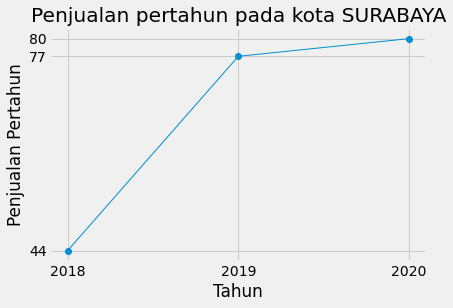

,Tahun,Penjualan
1,2018,44
2,2019,77
3,2020,80


In [10]:
# menampilkan grafik penjualan pada kota surabaya tiap tahun
kota = 'Surabaya'
c.execute('''SELECT strftime('%Y', transaksi.tanggal_transaksi), sum(transaksi.jumlah_beli) as total
          FROM transaksi join pelanggan on pelanggan.id = transaksi.pelanggan_id 
          join kota on kota.id = pelanggan.kota_id 
          join barang on barang.id = transaksi.barang_id
          where kota.kota = "''' + str(kota) +'''"
          group by strftime('%Y', transaksi.tanggal_transaksi), kota.kota
          order by date(transaksi.tanggal_transaksi) ASC
          ''')

tahun_kota = []
for row in c.fetchall():
    tahun_kota.append(row)
    
np_tahun_kota = np.array(tahun_kota)
plt.plot([ int(x[0]) for x in np_tahun_kota[:,:]], [ int(x[1]) for x in np_tahun_kota[:,:]],'-o',linewidth=1.0)
plt.xticks([ int(x[0]) for x in np_tahun_kota[:,:]], [ int(x[0]) for x in np_tahun_kota[:,:]])
plt.yticks([ int(x[1]) for x in np_tahun_kota[:,:]], [ int(x[1]) for x in np_tahun_kota[:,:]])
plt.xlabel('Tahun')
plt.ylabel('Penjualan Pertahun')
plt.title("Penjualan pertahun pada kota " + kota.upper())
plt.show()

df = pd.DataFrame([ x for x in np_tahun_kota[:,:]])
df.columns = ['Tahun', 'Penjualan']
df.index = np.arange(1,len(df)+1)
df

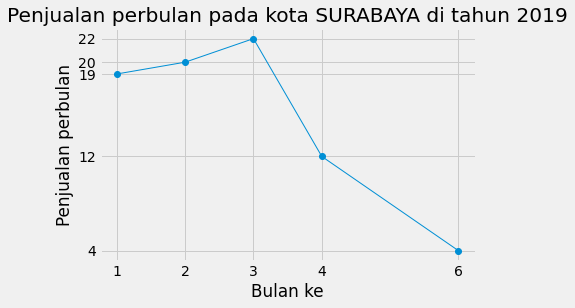

,Bulan,Penjualan
1,01,19
2,02,20
3,03,22
4,04,12
5,06,4


In [11]:
# menampilkan grafik penjualan tiap bulan pada di kota Surabaya pada tahun 2019
kota = 'Surabaya'
tahun = '2019'

c.execute('''SELECT strftime('%m', transaksi.tanggal_transaksi), sum(transaksi.jumlah_beli) as total
          FROM transaksi join pelanggan on pelanggan.id = transaksi.pelanggan_id 
          join kota on kota.id = pelanggan.kota_id 
          join barang on barang.id = transaksi.barang_id
          where strftime('%Y', transaksi.tanggal_transaksi) = "''' + str(tahun) +'''"
          and kota.kota = "''' + str(kota) +'''"
          group by strftime('%m', transaksi.tanggal_transaksi), kota.kota
          order by strftime('%m', transaksi.tanggal_transaksi) ASC
          ''')

tahun_kota = []
for row in c.fetchall():
    tahun_kota.append(row)


np_tahun_kota = np.array(tahun_kota)
plt.plot([ int(x[0]) for x in np_tahun_kota[:,:]], [ int(x[1]) for x in np_tahun_kota[:,:]],'-o',linewidth=1.0)
plt.xticks([ int(x[0]) for x in np_tahun_kota[:,:]], [ int(x[0]) for x in np_tahun_kota[:,:]])
plt.yticks([ int(x[1]) for x in np_tahun_kota[:,:]], [ int(x[1]) for x in np_tahun_kota[:,:]])
plt.xlabel('Bulan ke')
plt.ylabel('Penjualan perbulan')
plt.title("Penjualan perbulan pada kota " + kota.upper() + " di tahun " + tahun)
plt.show()

df = pd.DataFrame([ x for x in np_tahun_kota[:,:]])
df.columns = ['Bulan', 'Penjualan']
df.index = np.arange(1,len(df)+1)
df

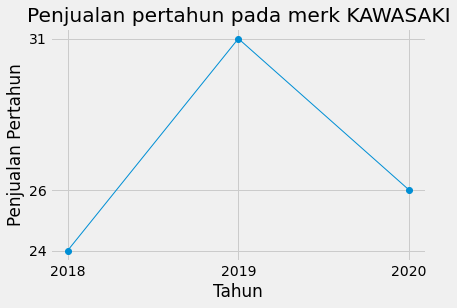

,Tahun,Terjual
1,2018,24
2,2019,31
3,2020,26


In [12]:
# menampilkan grafik penjualan merk kawasaki tiap tahun
merk = 'kawasaki'
c.execute('''SELECT strftime('%Y', transaksi.tanggal_transaksi), sum(transaksi.jumlah_beli) as total
          FROM transaksi join pelanggan on pelanggan.id = transaksi.pelanggan_id 
          join kota on kota.id = pelanggan.kota_id 
          join barang on barang.id = transaksi.barang_id
          where barang.merk = "''' + str(merk) +'''"
          group by strftime('%Y', transaksi.tanggal_transaksi), barang.merk
          order by date(transaksi.tanggal_transaksi) ASC
          ''')

tahun_kota = []
for row in c.fetchall():
    tahun_kota.append(row)
    
np_tahun_kota = np.array(tahun_kota)
plt.plot([ int(x[0]) for x in np_tahun_kota[:,:]], [ int(x[1]) for x in np_tahun_kota[:,:]],'-o',linewidth=1.0)
plt.xticks([ int(x[0]) for x in np_tahun_kota[:,:]], [ int(x[0]) for x in np_tahun_kota[:,:]])
plt.yticks([ int(x[1]) for x in np_tahun_kota[:,:]], [ int(x[1]) for x in np_tahun_kota[:,:]])
plt.xlabel('Tahun')
plt.ylabel('Penjualan Pertahun')
plt.title("Penjualan pertahun pada merk " + merk.upper())
plt.show()

df = pd.DataFrame([ x for x in np_tahun_kota[:,:]])
df.columns = ['Tahun', 'Terjual']
df.index = np.arange(1,len(df)+1)
df

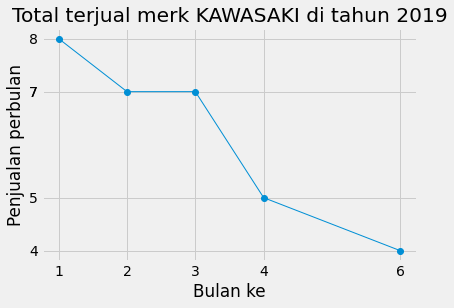

,Bulan,Penjualan
1,01,8
2,02,7
3,03,7
4,04,5
5,06,4


In [13]:
merk = 'kawasaki'
tahun = '2019'

c.execute('''SELECT strftime('%m', transaksi.tanggal_transaksi), sum(transaksi.jumlah_beli) as total
          FROM transaksi join pelanggan on pelanggan.id = transaksi.pelanggan_id 
          join kota on kota.id = pelanggan.kota_id 
          join barang on barang.id = transaksi.barang_id
          where strftime('%Y', transaksi.tanggal_transaksi) = "''' + str(tahun) +'''"
          and barang.merk = "''' + str(merk) +'''"
          group by strftime('%m', transaksi.tanggal_transaksi), barang.merk
          order by strftime('%m', transaksi.tanggal_transaksi) ASC
          ''')

tahun_kota = []
for row in c.fetchall():
    tahun_kota.append(row)


np_tahun_kota = np.array(tahun_kota)
plt.plot([ int(x[0]) for x in np_tahun_kota[:,:]], [ int(x[1]) for x in np_tahun_kota[:,:]],'-o',linewidth=1.0)
plt.xticks([ int(x[0]) for x in np_tahun_kota[:,:]], [ int(x[0]) for x in np_tahun_kota[:,:]])
plt.yticks([ int(x[1]) for x in np_tahun_kota[:,:]], [ int(x[1]) for x in np_tahun_kota[:,:]])
plt.xlabel('Bulan ke')
plt.ylabel('Penjualan perbulan')
plt.title("Total terjual merk " + merk.upper() + " di tahun " + tahun)
plt.show()

df = pd.DataFrame([ x for x in np_tahun_kota[:,:]])
df.columns = ['Bulan', 'Penjualan']
df.index = np.arange(1,len(df)+1)
df